# Módulo 2: HTML: Requests y BeautifulSoup
## Parsing Pagina12

<img src='https://www.pagina12.com.ar/assets/media/logos/logo_pagina_12_n.svg?v=1.0.178' width=300></img>
En este módulo veremos cómo utilizar las bibliotecas `requests` y `bs4` para programar scrapers de sitios HTML. Nos propondremos armar un scraper de noticias del diario <a href='www.pagina12.com.ar'>Página 12</a>.

Supongamos que queremos leer el diario por internet. Lo primero que hacemos es abrir el navegador, escribir la URL del diario y apretar Enter para que aparezca la página del diario. Lo que ocurre en el momento en el que apretamos Enter es lo siguiente:
1. El navegador envía una solicitud a la URL pidiéndole información.
2. El servidor recibe la petición y procesa la respuesta.
3. El servidor envía la respuesta a la IP de la cual recibió la solicitud.
4. Nuestro navegador recibe la respuesta y la muestra **formateada** en pantalla.

Para hacer un scraper debemos hacer un programa que replique este flujo de forma automática y sistemática para luego extraer la información deseada de la respuesta. Utilizaremos `requests` para realizar peticiones y recibir las respuestas y `bs4` para *parsear* la respuesta y extraer la información.<br>
Te dejo unos links que tal vez te sean de utilidad:
- [Códigos de status HTTP](https://developer.mozilla.org/es/docs/Web/HTTP/Status)
- [Documentación de requests](https://requests.kennethreitz.org/en/master/)
- [Documentación de bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [1]:
import requests

In [2]:
url = 'https://www.pagina12.com.ar/'

In [3]:
p12 = requests.get(url)

In [4]:
print(dir(p12))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [5]:
p12.status_code

200

In [6]:
print(p12.text)

<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>Página12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer político de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="Página12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:description" content="Notas

In [7]:
print(p12.content)

b'<!DOCTYPE html><html class="no-js"><head><meta charset="utf-8"><title>P\xc3\xa1gina12 | La otra mirada</title><meta name="google-site-verification" content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg"><script type="application/ld+json">{"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}</script><meta property="description" name="description" content="Notas focalizadas en el quehacer pol\xc3\xadtico de la Argentina."><meta property="fb:pages" name="fb:pages" content="1541638399393436"><meta property="og:locale" name="og:locale" content="es_AR"><meta property="og:title" name="og:title" content="P\xc3\xa1gina12 | La otra mirada"><meta property="og:site_name" name="og:site_name" content="PAGINA12"><meta property="og:type" name="og:type" content="website"><meta property="og:url" name="og:url" content="https://www.pagina12.com.ar"><meta property="og:description" name="og:desc

In [8]:
p12.headers

{'Date': 'Sat, 19 Sep 2020 20:08:03 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=df77f32e56e12fc5a3e66a2bdb85a9f911600546083; expires=Mon, 19-Oct-20 20:08:03 GMT; path=/; domain=.pagina12.com.ar; HttpOnly; SameSite=Lax', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"60137-e0g7URNTiS26AXp3ZoR0zftZDAA"', 'X-Backend': 'frontend', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '0', 'grace': '86400.000 none', 'ttl': '119.569', 'X-Instance': 'cache-front-prod-varnish-6f54cb8b98-ndzzd', 'x-restarts': '0', 'X-Cache': 'HIT (2)', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '0549942ac60000d29666848200000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/bea

In [9]:
p12.request.headers

{'User-Agent': 'python-requests/2.24.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [10]:
p12.request.method

'GET'

In [11]:
p12.request.url

'https://www.pagina12.com.ar/'

In [12]:
from bs4 import BeautifulSoup

In [13]:
s = BeautifulSoup(p12.text, 'lxml')

In [14]:
print(dir(s))

['ASCII_SPACES', 'DEFAULT_BUILDER_FEATURES', 'NO_PARSER_SPECIFIED_WARNING', 'ROOT_TAG_NAME', '__bool__', '__call__', '__class__', '__contains__', '__copy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_strings', '_check_markup_is_url', '_decode_markup', '_feed', '_find_all', '_find_one', '_is_xml', '_lastRecursiveChild', '_last_descendant', '_linkage_fixer', '_most_recent_element', '_namespaces', '_popToTag', '_should_pretty_print', 'append', 'attrs', 'builder', 'can_be_empty_element', 'cdata_list_attributes', 'childGenerator', 'children', 'clear', 'contains_replacement_characters', 'co

In [15]:
type(s)

bs4.BeautifulSoup

In [16]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar" name="og:url" property="og:url"/>
  <meta 

In [17]:
secciones = s.find('ul', attrs={'class':'hot-sections'}).find_all('li')
secciones

[<li class=""><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class=""><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="no-border"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/contratapa">Contratapa</a></li>,
 <li class="show-for-large"><a href="https://www.pagina12.com.ar/secciones/recordatorios">Recordatorios</a></li>]

In [18]:
seccion = secciones[0]

In [19]:
seccion.a.get_text()

'El país'

In [20]:
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [21]:
links_secciones = [seccion.a.get('href') for seccion in secciones]

In [22]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa',
 'https://www.pagina12.com.ar/secciones/recordatorios']

In [23]:
sec = requests.get(links_secciones[0])

In [24]:
sec.status_code

200

In [25]:
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [26]:
print(s_seccion.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <link href="https://www.pagina12.com.ar/secciones/el-pais" rel="canonical"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","url": "https://www.pagina12.com.ar","logo": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png"}
  </script>
  <meta content="La puja política de coyuntura y la reflexión de prestigiosos columnistas sobre la actualidad.
" name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="El país | Página12" name="og:title" property="og:title"/>
  <meta content="PAGINA12" name="og:site_name" property="og:site_name"/>
  <meta content="website" name="og:type" property="og:type"/>
  <meta content="https://www.pagina12.com.ar/secciones/el-pais" name="og:url" prope

In [27]:
featured_article = s_seccion.find('div', attrs={'class':'featured-article__container'})
featured_article

<div class="featured-article__container"><span class="title-prefix"><a href="https://www.pagina12.com.ar/293236-la-conmovedora-entrevista-a-francisco-madariaga-quintela-en-">“Que te cuenten tu historia es un regalo de la vida”, le decía el nieto 101 a Página/12 en 2010</a></span><h2><a href="https://www.pagina12.com.ar/293236-la-conmovedora-entrevista-a-francisco-madariaga-quintela-en-">La conmovedora entrevista a Francisco Madariaga Quintela en el día que recuperó su identidad </a></h2><a href="https://www.pagina12.com.ar/293236-la-conmovedora-entrevista-a-francisco-madariaga-quintela-en-"><p class="subhead"></p></a><div class="data-bar"><span class="date-1">19 de septiembre de 2020</span><span> | </span><span class="tag-1"><strong><span>Por </span><a class="no-link">Diego Martínez</a></strong></span></div></div>

In [28]:
featured_article.a.get('href')

'https://www.pagina12.com.ar/293236-la-conmovedora-entrevista-a-francisco-madariaga-quintela-en-'

In [29]:
article_list = s_seccion.find('ul', attrs={'class':'article-list'})

In [30]:
print(article_list)

<ul class="article-list"><li></li><li><div class="article-box-sections article-box--white-box article-box--printed article-box--with-image article-box--not-using-section-label" data-order="100"><div class="first-col column small-8 xsmall-8"><div class="article-box__container"><h5 class="hide-for-xsmall-only hide-for-small-only"></h5><h2><a href="https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101">Murió Francisco Madariaga Quintela, el nieto recuperado 101<i>|</i><span>Tenía 43 años y se pudo reencontrar con su padre en 2010</span></a></h2><div class="data-bar"><span class="date-1">19 de septiembre de 2020</span></div></div></div><div class="second-col column small-4 xsmall-4 no-pad-left-sm"><div class="article-box__image-container"><a class="relative object-fit intrinsic-container intrinsic-container-16x9" href="https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101"><img alt="Francisco con su padre, poco

In [31]:
def obtener_notas(soup):
    '''
    Función que recibe un objeto de BeautifulSoup de una página de una sección
    y devuelve una lista de URLs a las notas de esa sección
    '''
    lista_notas = []
    
    # Obtengo el artículo promocionado
    featured_article = soup.find('div', attrs={'class':'featured-article__container'})
    if featured_article:
        lista_notas.append(featured_article.a.get('href'))
    
    # Obtengo el listado de artículos
    article_list = soup.find('ul', attrs={'class':'article-list'})
    for article in article_list.find_all('li'):
        if article.a:
            lista_notas.append(article.a.get('href'))
    
    return lista_notas

In [32]:
lista_notas = obtener_notas(s_seccion)
lista_notas

['https://www.pagina12.com.ar/293236-la-conmovedora-entrevista-a-francisco-madariaga-quintela-en-',
 'https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101',
 'https://www.pagina12.com.ar/293209-enciendan-la-betosenal',
 'https://www.pagina12.com.ar/293206-alberto-fernandez-ahora-parece-que-nadie-es-macrista-pido-un',
 'https://www.pagina12.com.ar/293201-santiago-cafiero-duhalde-esta-mal-lo-tiene-que-cuidar-la-fam',
 'https://www.pagina12.com.ar/293197-vacuna-contra-el-coronavirus-el-gobierno-definio-pautas-para',
 'https://www.pagina12.com.ar/293108-el-estado-sera-querellante-en-la-causa-mas-grave-contra-macr',
 'https://www.pagina12.com.ar/293121-coronavirus-en-argentina-197-nuevas-muertes-y-11-945-nuevos-',
 'https://www.pagina12.com.ar/293145-las-6-provincias-con-mas-contagios-en-los-ultimos-15-dias',
 'https://www.pagina12.com.ar/293146-continua-la-puja-por-las-clases-en-la-ciudad-de-buenos-aires',
 'https://www.pagina12.com.ar/293149-los-ju

## Manejo de errores. 
Código de error != 200

In [33]:
r = requests.get(url)

In [34]:
if r.status_code == 200:
    print('Procesamos la respuesta')
else:
    print('informamos el error')

Procesamos la respuesta


In [35]:
url_mala = url.replace('2','3')
url_mala

'https://www.pagina13.com.ar/'

In [36]:
try:
    requests.get(url_mala)
except Exception as e:
    print('error en la request')
    print(e)

error en la request
HTTPSConnectionPool(host='www.pagina13.com.ar', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000225A6FD2DF0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


In [37]:
featured_article.b.get('href')

AttributeError: 'NoneType' object has no attribute 'get'

In [38]:
try:
    featured_article.b.get('href')
except:
    pass
print('continua el codigo')

continua el codigo


In [39]:
url_nota = lista_notas[0]

In [40]:
try:
    nota = requests.get(url_nota)
    if nota.status_code == 200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        # Extraemos el titulo
        titulo = s_nota.find('h1', attrs={'class':'article-title'})
        print(titulo.text)
        # Extraer la fecha
        fecha = s_nota.find('span', attrs={'pubdate':'pubdate'}).get('datetime')
        print(fecha)
        # Extraer la volanta
        volanta = s_nota.find('h2', attrs={'class':'article-prefix'})
        print(volanta.get_text())
except Exception as e:
    print('Error:')
    print(e)
    print('\n')

La conmovedora entrevista a Francisco Madariaga Quintela en el día que recuperó su identidad 
2020-09-19
“Que te cuenten tu historia es un regalo de la vida”, le decía el nieto 101 a Página/12 en 2010


In [41]:
media = s_nota.find('div', attrs={'class':'article-main-media-image'})

In [42]:
imagenes = media.find_all('img')
imagenes

[<img class="lazyload show-for-xsmall-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_470x313/public/2020-09/106288-whatsapp-20image-202020-09-19-20at-2016-11-16.jpeg?itok=2JSP_29e" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-small-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106288-whatsapp-20image-202020-09-19-20at-2016-11-16.jpeg?itok=62OI2rff" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-medium-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106288-whatsapp-20image-202020-09-19-20at-2016-11-16.jpeg?itok=62OI2rff" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif"/>,
 <img class="lazyload show-for-large-only" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106288-whatsapp-20image-202020-09-19-20at-2016-11-16.jpeg?itok=6

In [43]:
if len(imagenes) == 0:
    print('no se encontraron imágenes')
else:
    imagen = imagenes[-1]
    img_src = imagen.get('data-src')
    print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2020-09/106288-whatsapp-20image-202020-09-19-20at-2016-11-16.jpeg?itok=62OI2rff


In [44]:
img_req = requests.get(img_src)

In [45]:
img_req.status_code

200

In [46]:
from IPython.display import Image

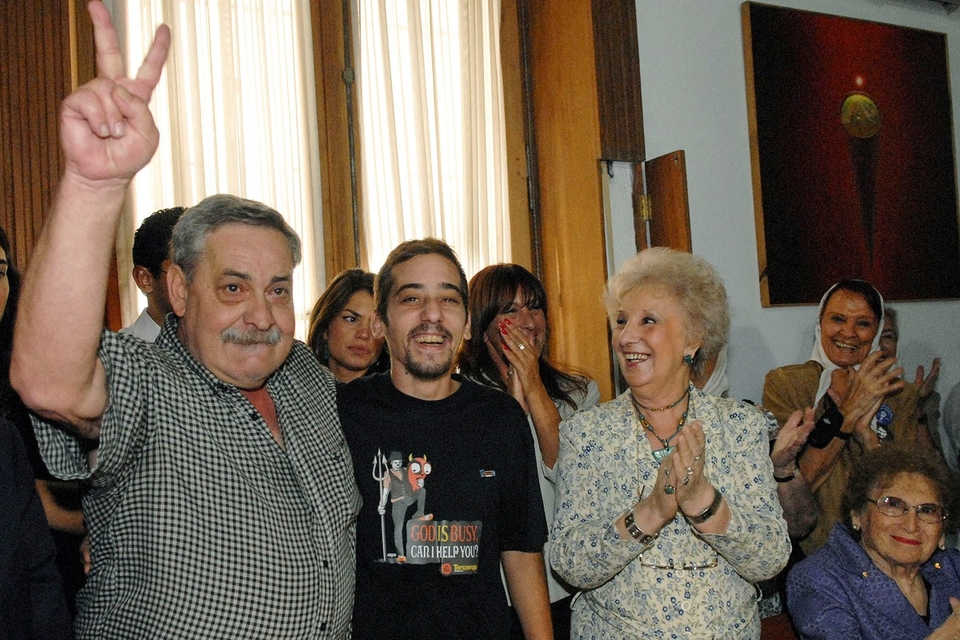

In [47]:
Image(img_req.content)

In [48]:
def obtener_info(s_nota):
    
    # Creamos un diccionario vacío para poblarlo con la información
    ret_dict = {}
    
    # Extraemos la fecha
    fecha = s_nota.find('span', attrs={'pubdate':'pubdate'})
    if fecha:
        ret_dict['fecha'] = fecha.get('datetime')
    else:
        ret_dict['fecha'] = None
    
    # Extraemos el título
    titulo = s_nota.find('h1', attrs={'class':'article-title'})
    if titulo:
        ret_dict['titulo'] = titulo.text
    else:
        ret_dict['titulo'] = None

    # Extraemos la volanta
    volanta = s_nota.find('h2', attrs={'class':'article-prefix'})
    if volanta:
        ret_dict['volanta'] = volanta.get_text()
    else:
        ret_dict['volanta'] = None
    
    # Extraemos el copete
    copete = s_nota.find('div', attrs={'class':'article-summary'})
    if copete:
        ret_dict['copete'] = copete.get_text()
    else:
        ret_dict['copete'] = None
    
    autor = s_nota.find('div', attrs={'class':'article-author'})
    if autor:
        ret_dict['autor'] = autor.a.get_text()
    else:
        ret_dict['autor'] = None
    
    # Extraemos la imagen
    #media = s_nota.find('div', attrs={'class':'article-main-media-image'})
    #if media:
        #imagenes = media.find_all('img')
        #if len(imagenes) == 0:
            #print('no se encontraron imágenes')
        #else:
            #imagen = imagenes[-1]
            #img_src = imagen.get('data-src')
            #try:
                #img_req = requests.get(img_src)
                #if img_req.status_code == 200:
                    #ret_dict['imagen'] = img_req.content
                #else:
                    #ret_dict['imagen'] = None
            #except:
                #print('No se pudo obtener la imagen')
    #else:
        #print('No se encontró media')
    
    # Extraemos el cuerpo de la nota
    cuerpo = s_nota.find('div', attrs={'class':'article-text'})
    if cuerpo:
        ret_dict['texto'] = cuerpo.get_text()
    else:
        ret_dict['texto'] = None
    
    return ret_dict

In [49]:
def scrape_nota(url):
    try:
        nota = requests.get(url)
    except Exception as e:
        print('Error scrapeando URL', url)
        print(e)
        return None
    
    if nota.status_code !=200:
        print(f'Error obteniendo nota {url}')
        print(f'stuts Code = {nota.status_code}')
        return None
    
    s_nota = BeautifulSoup(nota.text, 'lxml')
    
    ret_dict = obtener_info(s_nota)
    ret_dict['url'] = url
    
    return ret_dict

In [50]:
scrape_nota(url_nota)

{'fecha': '2020-09-19',
 'titulo': 'La conmovedora entrevista a Francisco Madariaga Quintela en el día que recuperó su identidad\xa0',
 'volanta': '“Que te cuenten tu historia es un regalo de la vida”, le decía el nieto 101 a Página/12 en 2010',
 'copete': None,
 'autor': 'Diego Martínez',
 'texto': 'Entrevista publicada el 28 de febrero de 2010\xa0Durante treinta y dos años vivió con identidad falsa, apropiado por Víctor Alejandro Gallo, capitán del Batallón de Inteligencia 601, carapintada, delincuente de fuste, que llegó a gatillarle en la cabeza. “Era su juguete de guerra”, resume. La duda comenzó a los veinte pero hizo falta una década y la presión de los amigos para acercarse a Abuelas. En dos semanas quebró a la apropiadora, supo que nació en cautiverio en Campo de Mayo, que se llama Francisco Madariaga Quintela, que su mamá Silvia ejerció como médica hasta que el Ejército la borró de la tierra, y conoció a su padre, Abel, secretario de Abuelas desde 1983. “Es un regalo de la vi

In [51]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/contratapa',
 'https://www.pagina12.com.ar/secciones/recordatorios']

In [52]:
notas = []
for link in links_secciones:
    try:
        r = requests.get(link)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'lxml')
            notas.extend(obtener_notas(soup))
        else:
            print('No se pudo obtener la sección', link)
    except:
        print('No se pudo obtener la sección', link)

In [53]:
print(notas)  #O notas

['https://www.pagina12.com.ar/293236-la-conmovedora-entrevista-a-francisco-madariaga-quintela-en-', 'https://www.pagina12.com.ar/293225-murio-francisco-madariaga-quintela-el-nieto-recuperado-101', 'https://www.pagina12.com.ar/293209-enciendan-la-betosenal', 'https://www.pagina12.com.ar/293206-alberto-fernandez-ahora-parece-que-nadie-es-macrista-pido-un', 'https://www.pagina12.com.ar/293201-santiago-cafiero-duhalde-esta-mal-lo-tiene-que-cuidar-la-fam', 'https://www.pagina12.com.ar/293197-vacuna-contra-el-coronavirus-el-gobierno-definio-pautas-para', 'https://www.pagina12.com.ar/293108-el-estado-sera-querellante-en-la-causa-mas-grave-contra-macr', 'https://www.pagina12.com.ar/293121-coronavirus-en-argentina-197-nuevas-muertes-y-11-945-nuevos-', 'https://www.pagina12.com.ar/293145-las-6-provincias-con-mas-contagios-en-los-ultimos-15-dias', 'https://www.pagina12.com.ar/293146-continua-la-puja-por-las-clases-en-la-ciudad-de-buenos-aires', 'https://www.pagina12.com.ar/293149-los-jueces-brugl

In [54]:
data = []
for i, nota in enumerate(notas):
    print(f'Scrapeando nota {i}/{len(notas)}')
    data.append(scrape_nota(nota))

Scrapeando nota 0/106
Scrapeando nota 1/106
Scrapeando nota 2/106
Scrapeando nota 3/106
Scrapeando nota 4/106
Scrapeando nota 5/106
Scrapeando nota 6/106
Scrapeando nota 7/106
Scrapeando nota 8/106
Scrapeando nota 9/106
Scrapeando nota 10/106
Scrapeando nota 11/106
Scrapeando nota 12/106
Scrapeando nota 13/106
Scrapeando nota 14/106
Scrapeando nota 15/106
Scrapeando nota 16/106
Scrapeando nota 17/106
Scrapeando nota 18/106
Scrapeando nota 19/106
Scrapeando nota 20/106
Scrapeando nota 21/106
Scrapeando nota 22/106
Scrapeando nota 23/106
Scrapeando nota 24/106
Scrapeando nota 25/106
Scrapeando nota 26/106
Scrapeando nota 27/106
Scrapeando nota 28/106
Scrapeando nota 29/106
Scrapeando nota 30/106
Scrapeando nota 31/106
Scrapeando nota 32/106
Scrapeando nota 33/106
Scrapeando nota 34/106
Scrapeando nota 35/106
Scrapeando nota 36/106
Scrapeando nota 37/106
Scrapeando nota 38/106
Scrapeando nota 39/106
Scrapeando nota 40/106
Scrapeando nota 41/106
Scrapeando nota 42/106
Scrapeando nota 43/10

In [55]:
len(data)

106

In [56]:
import pandas as pd

In [57]:
df = pd.DataFrame(data)

In [58]:
df.head(5)

,fecha,titulo,volanta,copete,autor,texto,url
0,2020-09-19,La conmovedora entrevista a Francisco Madariag...,“Que te cuenten tu historia es un regalo de la...,None,Diego Martínez,Entrevista publicada el 28 de febrero de 2010 ...,https://www.pagina12.com.ar/293236-la-conmoved...
1,2020-09-19,"Murió Francisco Madariaga Quintela, el nieto r...",Tenía 43 años y se pudo reencontrar con su pad...,Estaba entre los pocos que pudieron reencontra...,Diego Martínez,El nieto recuperado Francisco Madariaga Quinte...,https://www.pagina12.com.ar/293225-murio-franc...
2,2020-09-19,¡Enciendan la Betoseñal!,None,None,Marcelo Rudaeff (Rudy),Querides aguantadoris; amados cuarentenadísime...,https://www.pagina12.com.ar/293209-enciendan-l...
3,2020-09-19,"Alberto Fernández: ""Ahora parece que nadie es ...","El Presidente cuestionó el ""desastre"" que dejó...","""Si nos critican es porque estamos haciendo la...",Diego Martínez,El presidente Alberto Fernández aseguró anoche...,https://www.pagina12.com.ar/293206-alberto-fer...
4,2020-09-19,"Santiago Cafiero: ""Duhalde está mal, lo tiene ...",El jefe de Gabinete se refirió también a las m...,"""La Argentina necesita dólares genuinos de exp...",Diego Martínez,"El jefe de Gabinete, Santiago Cafiero, rechazó...",https://www.pagina12.com.ar/293201-santiago-ca...


In [60]:
df.to_csv('NotasPagina12.csv',index= False)